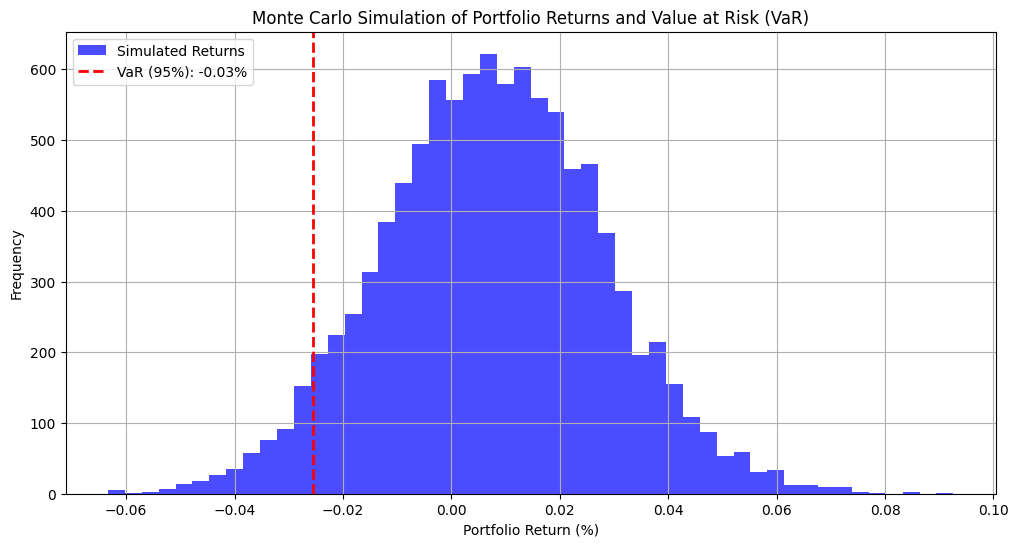

Portfolio VaR at 95% confidence level: -0.03%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'Date': ['2024-11-20', '2024-11-20', '2024-11-21', '2024-11-21', '2024-11-22', '2024-11-22'],
    'Open': [100, 200, 102, 202, 101, 201],
    'High': [110, 210, 112, 212, 111, 211],
    'Low': [90, 190, 92, 192, 91, 191],
    'Close': [105, 205, 108, 208, 107, 207],
    'Volume': [1000, 1500, 1200, 1800, 1100, 1600],
    'Symbol': ['AAPL', 'MSFT', 'AAPL', 'MSFT', 'AAPL', 'MSFT'],
}
df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate daily returns for each symbol
df['Percent_Change'] = df.groupby('Symbol')['Close'].pct_change() * 100

# Pivot table to create a matrix of symbols with daily percent changes
returns_df = df.pivot(index='Date', columns='Symbol', values='Percent_Change').dropna()

# Portfolio weights (example: 50% AAPL, 50% MSFT)
weights = np.array([0.5, 0.5])

# Calculate portfolio returns
portfolio_returns = returns_df.dot(weights / 100)  # Normalize weights

# Monte Carlo Simulation
num_simulations = 10000
mean = portfolio_returns.mean()
std_dev = portfolio_returns.std()

simulated_returns = np.random.normal(mean, std_dev, num_simulations)
var_95 = np.percentile(simulated_returns, 5)  # 5th percentile for 95% confidence level

# Visualization
plt.figure(figsize=(12, 6))

# Plot histogram of simulated returns
plt.hist(simulated_returns, bins=50, alpha=0.7, color='blue', label='Simulated Returns')

# Add VaR line
plt.axvline(var_95, color='red', linestyle='--', linewidth=2, label=f'VaR (95%): {var_95:.2f}%')

# Add title and labels
plt.title('Monte Carlo Simulation of Portfolio Returns and Value at Risk (VaR)')
plt.xlabel('Portfolio Return (%)')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)

# Show plot
plt.show()

# Display VaR
print(f"Portfolio VaR at 95% confidence level: {var_95:.2f}%")
